In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

#modify path to building_coords.csv from dataset
df=pd.read_csv('building_coords.csv',header=None) 
df.head()

,0,1,2,3,4,5,6,7,8
0,0,15.014205,44.816755,18.854302,16.662315,49.649641,20.874097,45.846827,48.990595
1,1,20.928684,42.077923,28.086922,18.325006,43.335462,22.916224,36.177223,46.669142
2,2,17.703355,37.696567,26.390176,18.345167,48.163152,28.134698,39.476331,47.486100
3,3,16.729955,40.551562,29.256873,14.218458,49.128442,23.704446,36.638807,50.037551
4,4,17.946267,24.206756,47.101177,23.713484,47.362154,40.029394,18.207244,40.522666


In [2]:
df_orig=df.copy()

def change_coordinates(Z):
    
    X=Z[:,0]
    Y=Z[:,1]

    X_mean=sum(X[:4])/4
    Y_mean=sum(Y[:4])/4
    
    X=X-X_mean
    Y=Y-Y_mean
    
    X1=2*X
    Y1=2*Y
    
    X1=X1+2*X_mean
    Y1=Y1+2*Y_mean
    
    X1=X1.reshape(-1,1)
    Y1=Y1.reshape(-1,1)
    
    Z_new=np.hstack((X1,Y1))
    return Z_new

for i in range(len(df)):
    Z=df.loc[i][1:].values
    Z=np.append(Z,[Z[0],Z[1]])
    Z=Z.reshape(-1,2)
    
    Z1=change_coordinates(Z)
    Z1=Z1[:4].reshape(-1,)
    df.loc[i,1:]=Z1

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,0,30.028409,89.633510,37.708603,33.324630,99.299282,41.748195,91.693653,97.981189
1,1,41.857367,84.155845,56.173845,36.650012,86.670924,45.832449,72.354447,93.338283
2,2,35.406709,75.393134,52.780351,36.690334,96.326304,56.269396,78.952662,94.972199
3,3,33.459911,81.103123,58.513746,28.436916,98.256884,47.408891,73.277614,100.075103
4,4,35.892534,48.413512,94.202354,47.426969,94.724309,80.058789,36.414489,81.045332


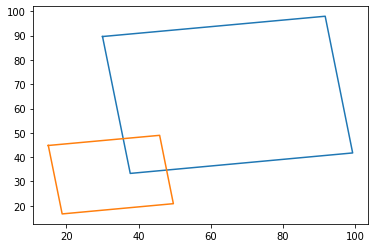

In [4]:
def make_plot(df,idx):

    Z=df.loc[idx][1:].values.reshape(-1,2)
    Z=np.append(Z,Z[0]).reshape(-1,2)

    X=Z[:,0]
    Y=Z[:,1]

    plt.plot(X,Y)
    return plt

idx=0

plt1=make_plot(df,idx)
plt2=make_plot(df_orig,idx)

plt.show()

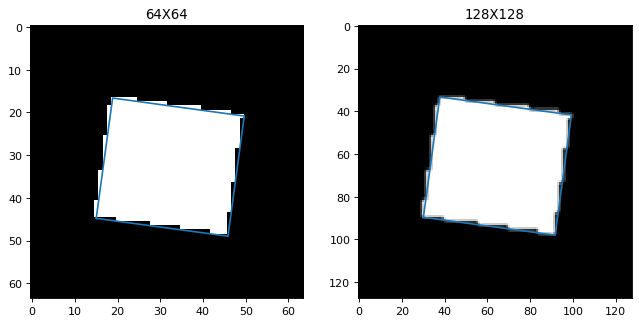

In [5]:
idx=0

def make_plot_2(df,img_path,size):

    img=cv2.imread(img_path)
    plt.title(f'{size}X{size}')
    plt1.imshow(img)
    plt2=make_plot(df,idx)
    
    return plt1, plt2

original_img_path=f'buildings_bing/single_buildings/train/building_mask_{idx}.png'
highres_img_path=f'buildings_bing_sr/single_buildings/train/building_mask_{idx}.png'

fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

ax = plt.subplot(131)
plt1, plt2 = make_plot_2(df_orig,original_img_path,64)

ax = plt.subplot(132)
plt3, plt4 = make_plot_2(df,highres_img_path,128)

plt.show()

In [6]:
df.to_csv('transformed_building_coords.csv',index=False)